In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.232, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-4 in yolov8:: 100%|██████████| 6008/6008 [00:00<00:00, 6282.22it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8l.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

100%|██████████| 83.7M/83.7M [00:00<00:00, 308MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-4 datasets/SixRayFull-2

# **TRAIN MODEL**

In [7]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data= '/kaggle/working/datasets/SixRayFull-2/data.yaml', epochs=70, imgsz=640, batch=16,project='YOLO_weights',name='SIXray_Output',exist_ok=True, device=[0, 1])

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/datasets/SixRayFull-2/data.yaml, epochs=70, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]
2024-01-02 15:03:39,321	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-02 15:03:40,302	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=6
Transferred 589/595 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:01<00:00, 1209.06it/s]


train: New cache created: /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels...:   0%|          | 0/466 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<00:00, 1475.92it/s]


val: New cache created: /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      5.65G      1.152      1.784       1.39         22        640: 100%|██████████| 144/144 [01:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.09it/s]


                   all        466       1127      0.713      0.302      0.321      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      5.81G      1.228      1.376      1.478         40        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]


                   all        466       1127      0.659      0.331      0.385      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      5.82G      1.251      1.312      1.502         41        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]


                   all        466       1127      0.619        0.3      0.364      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      5.81G      1.199      1.286      1.456         33        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.622      0.404      0.443      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      5.82G      1.149        1.2       1.41         43        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.675       0.47      0.521      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      5.82G      1.095      1.086      1.379         30        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.717      0.479      0.544      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      5.82G      1.103      1.092      1.394         32        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.713      0.501       0.56      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      5.82G      1.074       1.01      1.373         40        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127      0.709      0.511      0.568      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      5.81G      1.033     0.9658      1.338         46        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.738      0.507      0.567      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      5.81G       1.02     0.9171      1.322         25        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127      0.751      0.529      0.596      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      5.81G      1.009      0.874      1.308         41        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.791      0.507      0.591      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      5.81G      1.022     0.9085      1.336         36        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.765      0.537      0.607      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      5.81G     0.9745     0.8481      1.302         42        640: 100%|██████████| 144/144 [00:57<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.789      0.532       0.61      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      5.82G       0.96     0.8269      1.284         25        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127       0.77      0.557      0.631      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      5.82G     0.9521     0.8152      1.278         48        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.725      0.655      0.808      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      5.81G     0.9559     0.7944      1.274         53        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.798      0.628      0.673      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70       5.8G     0.9303     0.7638      1.246         34        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.959      0.583      0.723      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      5.82G     0.8993     0.7474      1.241         33        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.746       0.61      0.643      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70       5.8G     0.9053     0.7309      1.253         37        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.884      0.639       0.85      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70       5.8G     0.8988     0.7221      1.234         42        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.757      0.656      0.674      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      5.81G     0.8864     0.7171      1.241         22        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.875      0.682      0.732       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      5.82G     0.8684     0.6947      1.215         47        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.824      0.699      0.788      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      5.81G       0.87     0.6767       1.22         37        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.884      0.635      0.773      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      5.81G     0.8735     0.6713      1.222         39        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.917      0.645      0.747      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      5.82G     0.8615     0.6643      1.204         47        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]


                   all        466       1127      0.538      0.813      0.814      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      5.82G     0.8433     0.6414      1.196         35        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.893      0.712      0.744      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      5.81G     0.8482     0.6629      1.195         35        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]


                   all        466       1127      0.963      0.601      0.678      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      5.81G      0.838      0.645      1.196         23        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


                   all        466       1127      0.884       0.67      0.677      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      5.81G     0.8166     0.6033      1.175         40        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


                   all        466       1127      0.917      0.739      0.806      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      5.82G     0.8292     0.6292      1.167         25        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.861      0.705      0.715      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      5.82G     0.8053     0.6126       1.17         19        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.908       0.69      0.777      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      5.83G     0.7947     0.5949      1.162         30        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.925      0.645      0.718      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      5.81G     0.8078     0.5885      1.173         34        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]


                   all        466       1127      0.909      0.897       0.95      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      5.81G     0.7812     0.5736      1.159         32        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]


                   all        466       1127      0.769      0.837      0.867      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      5.82G     0.7962     0.5788      1.159         33        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127       0.92      0.654      0.811      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70       5.8G     0.7964     0.5732      1.157         31        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.877       0.75       0.78      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      5.81G     0.7781     0.5635      1.138         41        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.966      0.685      0.783      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      5.81G     0.7689     0.5598      1.141         28        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.693      0.863      0.832      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      5.81G     0.7497     0.5443      1.133         40        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.967      0.858      0.908      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      5.82G     0.7763      0.548      1.152         33        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.849      0.878       0.86      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      5.81G     0.7724     0.5392      1.154         36        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.87it/s]


                   all        466       1127      0.856      0.909       0.91      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      5.81G     0.7672     0.5392      1.147         27        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127       0.96      0.684      0.802      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      5.81G     0.7479     0.5214      1.118         39        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127      0.933      0.856      0.914      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      5.81G     0.7249     0.5176      1.116         52        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.855      0.809      0.883       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      5.81G     0.7238     0.5023      1.109         40        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]


                   all        466       1127      0.887      0.851      0.921      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      5.81G     0.7347     0.5184      1.124         21        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127       0.86      0.841      0.905      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      5.82G     0.7111     0.4839      1.094         46        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.684      0.946      0.845      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      5.81G     0.7208     0.4966       1.12         33        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.871      0.917      0.953      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      5.81G     0.6964     0.4874      1.094         40        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]


                   all        466       1127      0.868       0.92      0.859      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      5.81G     0.7085     0.4832      1.103         56        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]


                   all        466       1127      0.897      0.876      0.913      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      5.81G     0.6992     0.4855      1.103         19        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127      0.862      0.897      0.933       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      5.81G     0.6983      0.464      1.099         52        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.87it/s]


                   all        466       1127      0.858      0.881      0.825      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70       5.8G     0.7052     0.4819      1.107         47        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127      0.905      0.921      0.942      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      5.82G     0.6987     0.4787      1.103         32        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.832      0.922       0.93      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      5.81G     0.6703     0.4502      1.079         32        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


                   all        466       1127       0.87      0.767      0.775       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      5.81G     0.6803     0.4479      1.088         50        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]


                   all        466       1127      0.865      0.931      0.931      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      5.82G     0.6634     0.4425       1.07         24        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.966      0.916      0.947      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      5.81G     0.6594     0.4398      1.071         34        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]


                   all        466       1127      0.933      0.865       0.93      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      5.81G     0.6688      0.447      1.079         31        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.936      0.843      0.928      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      5.82G     0.6477     0.4347      1.065         28        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]


                   all        466       1127       0.93       0.85      0.917      0.757
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      5.81G     0.5641     0.3046      1.023         14        640: 100%|██████████| 144/144 [00:58<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


                   all        466       1127      0.934      0.854       0.93      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      5.81G     0.5542     0.3027       1.02         14        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.949      0.866      0.929      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70       5.8G      0.546     0.2979       1.01         21        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.949      0.848      0.937      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      5.81G     0.5529     0.2973      1.019         19        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]


                   all        466       1127      0.961      0.871      0.924      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      5.81G     0.5202     0.2842      1.006         25        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


                   all        466       1127      0.967      0.853      0.938      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      5.82G      0.519     0.2829     0.9967         21        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]


                   all        466       1127      0.923       0.91      0.959      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      5.81G     0.5157     0.2783     0.9938         20        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.946      0.856      0.941      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      5.81G      0.515     0.2769     0.9859         21        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]


                   all        466       1127      0.952      0.868      0.929      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      5.81G     0.4986     0.2707     0.9911         22        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]


                   all        466       1127      0.944      0.854       0.93      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      5.81G     0.5053     0.2709     0.9836         19        640: 100%|██████████| 144/144 [00:57<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        466       1127       0.95      0.854      0.925      0.774

70 epochs completed in 1.324 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 87.6MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 87.6MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.05it/s]


                   all        466       1127      0.922       0.91      0.959      0.787
                   Gun        466        645      0.984      0.982      0.994      0.865
                Hammer        466          1      0.617          1      0.995      0.895
                 Knife        466        319      0.979      0.896      0.963      0.754
                Pliers        466         84      0.995      0.964      0.994       0.86
              Scissors        466          4          1      0.683      0.828      0.529
                Wrench        466         74      0.959      0.936      0.979      0.821
Speed: 0.3ms preprocess, 13.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


# **VAIDATE MODEL**

In [8]:
# Load a model
model = YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16<00:00,  1.87it/s]


                   all        466       1127      0.922       0.91      0.959      0.787
                   Gun        466        645      0.984      0.982      0.994      0.864
                Hammer        466          1      0.617          1      0.995      0.895
                 Knife        466        319      0.979      0.896      0.963      0.753
                Pliers        466         84      0.994      0.964      0.994       0.86
              Scissors        466          4          1      0.684      0.828      0.529
                Wrench        466         74      0.958      0.936      0.979      0.821
Speed: 0.5ms preprocess, 28.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


array([    0.86422,      0.8955,     0.75349,     0.85952,     0.52854,     0.82057])

# **MODEL TESTING**


image 1/228 /kaggle/working/weapon_detection-4/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 85.6ms
image 2/228 /kaggle/working/weapon_detection-4/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 41.3ms
image 3/228 /kaggle/working/weapon_detection-4/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 91.8ms
image 4/228 /kaggle/working/weapon_detection-4/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 33.4ms
image 5/228 /kaggle/working/weapon_detection-4/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 33.4ms
image 6/228 /kaggle/working/weapon_detection-4/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 33.4ms
image 7/228 /kaggle/working/weapon_detection-4/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 33.5ms
image 8/228 /kaggle/w

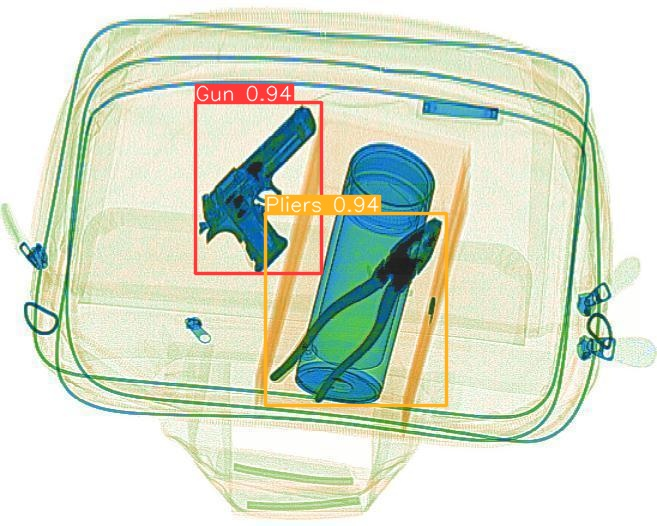

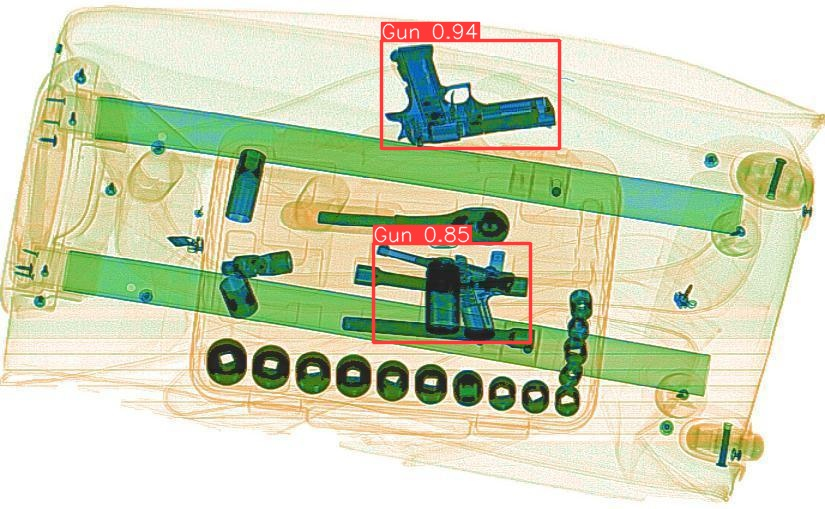

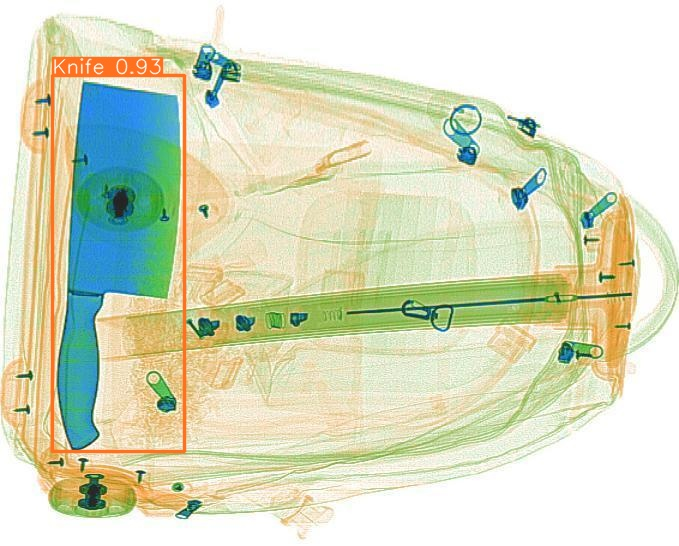

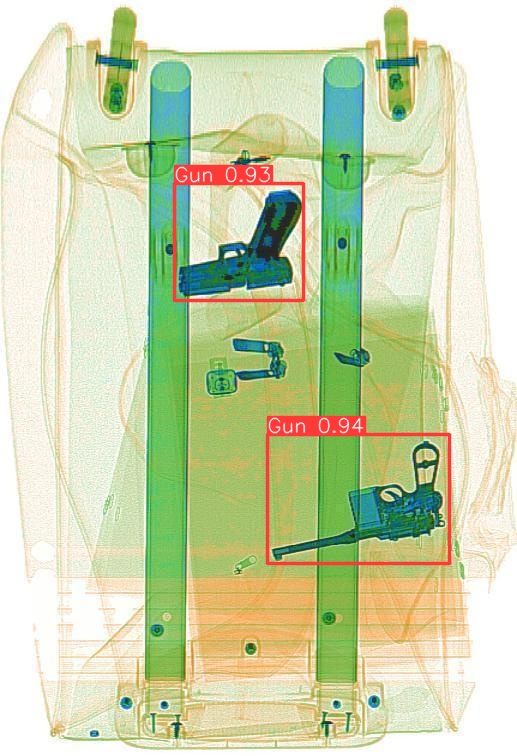

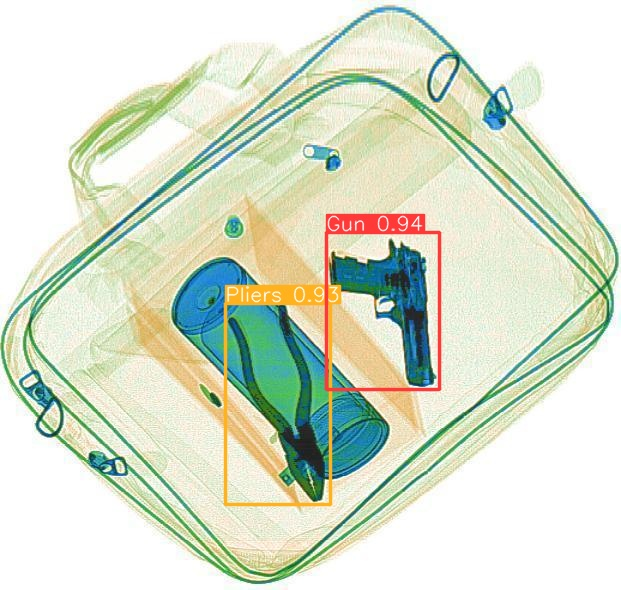

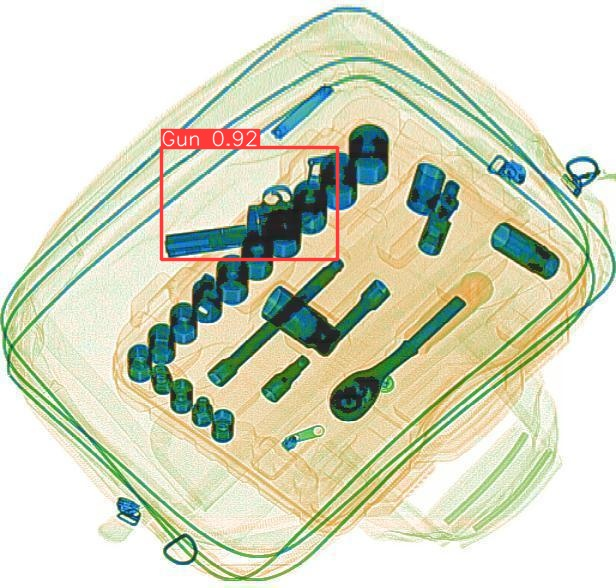

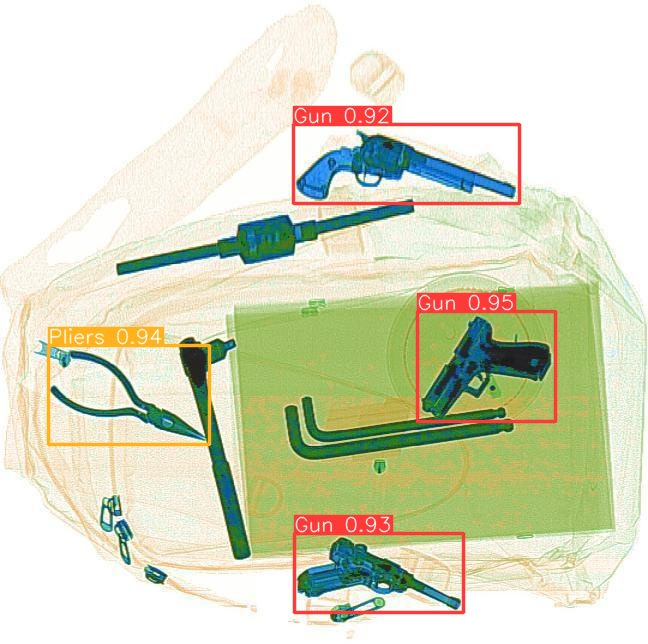

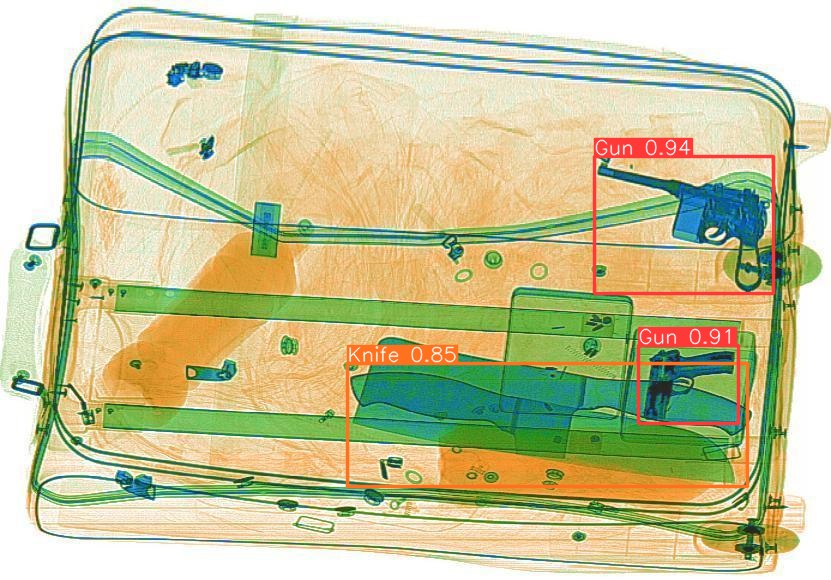

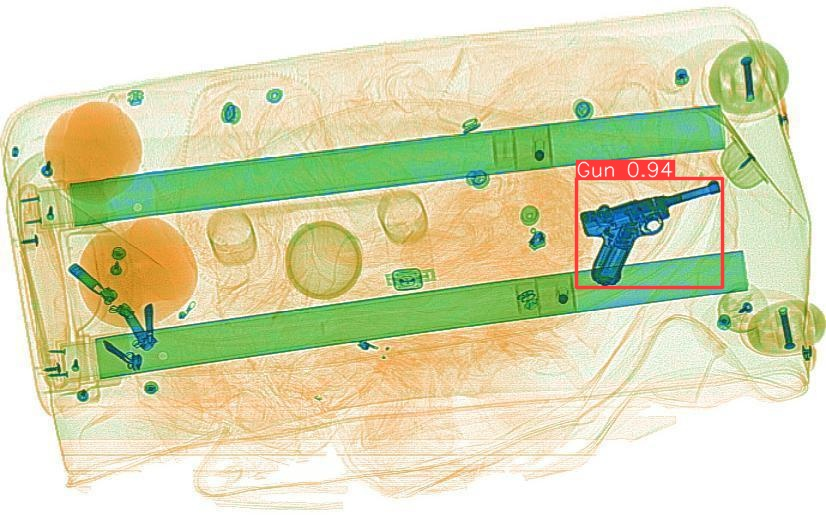

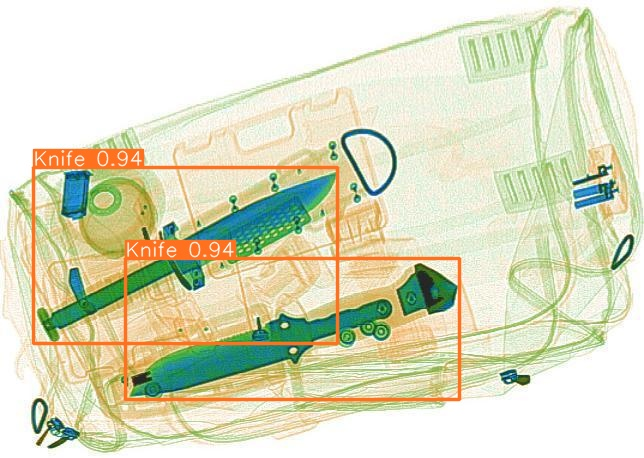

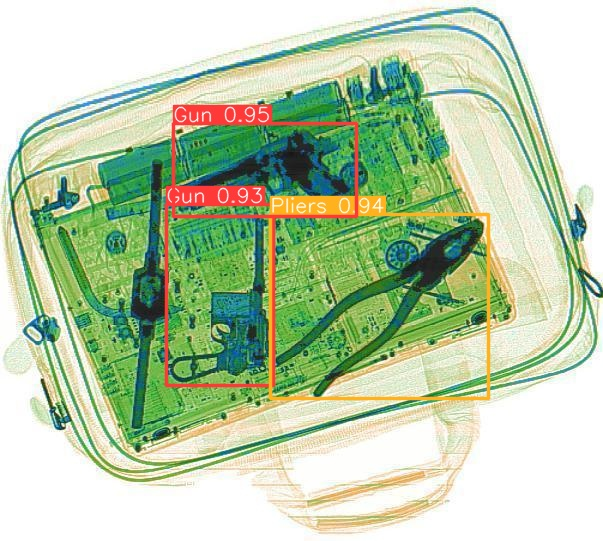

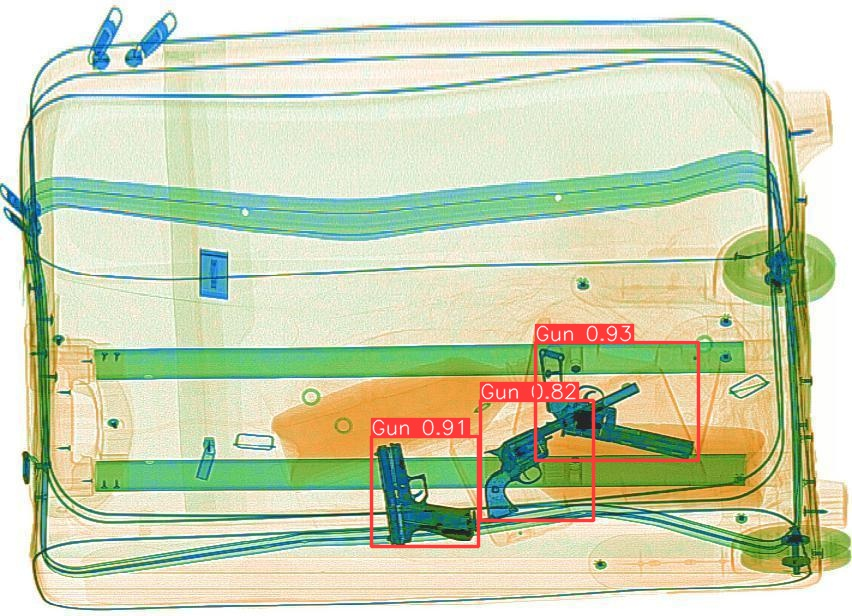

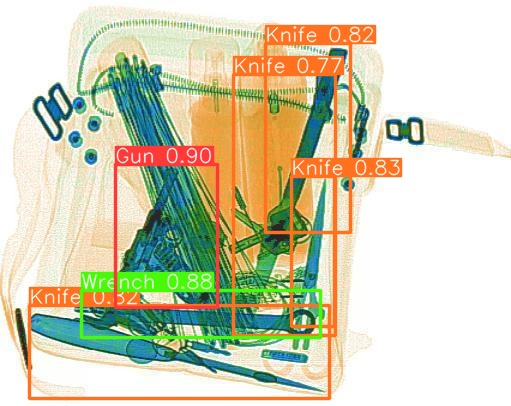

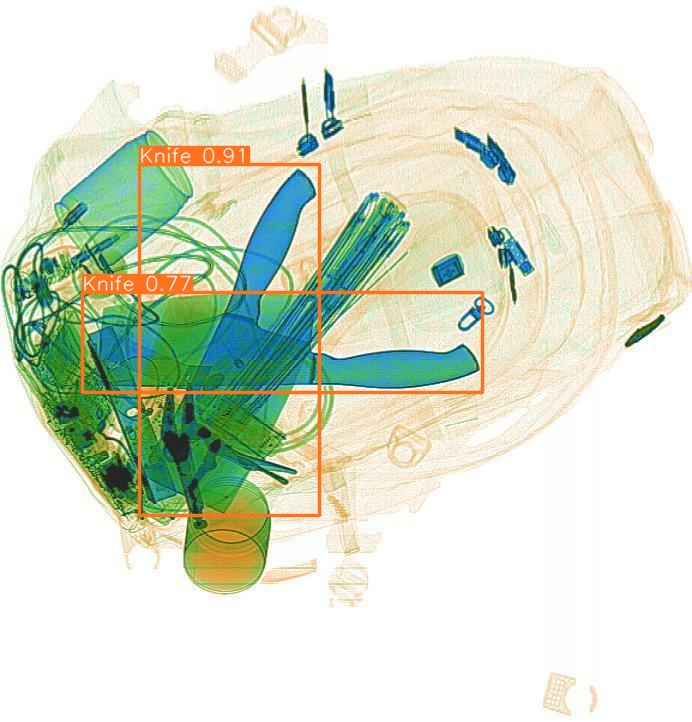

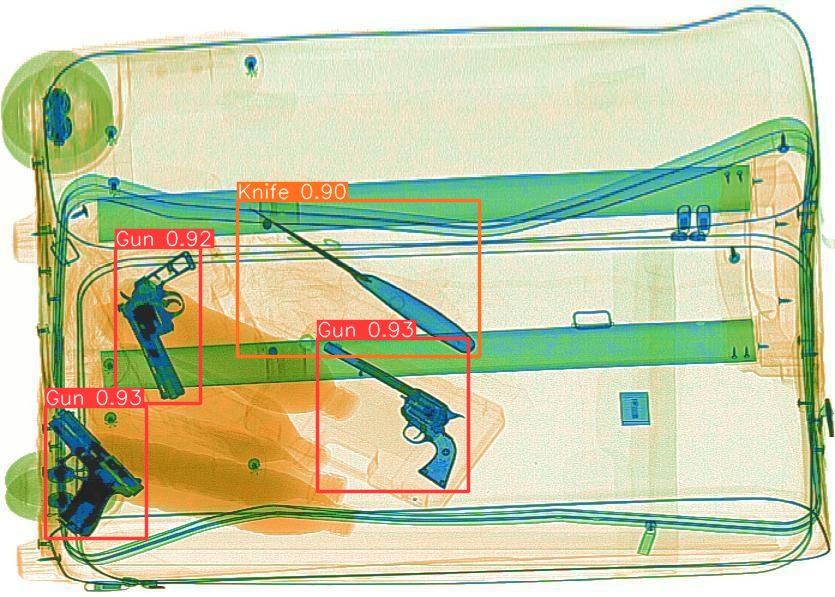

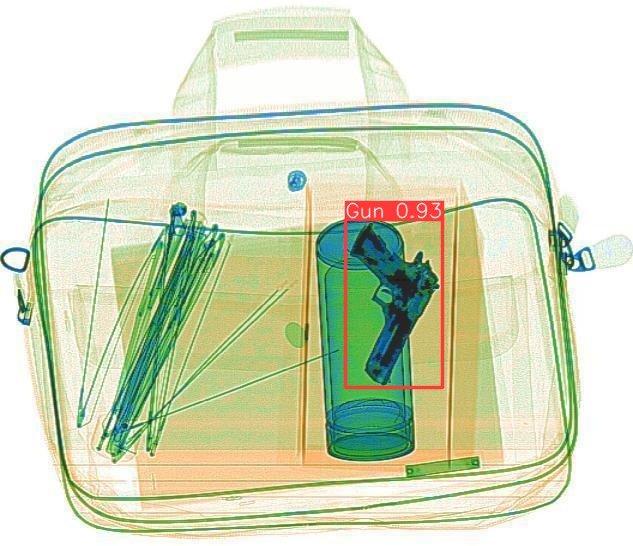

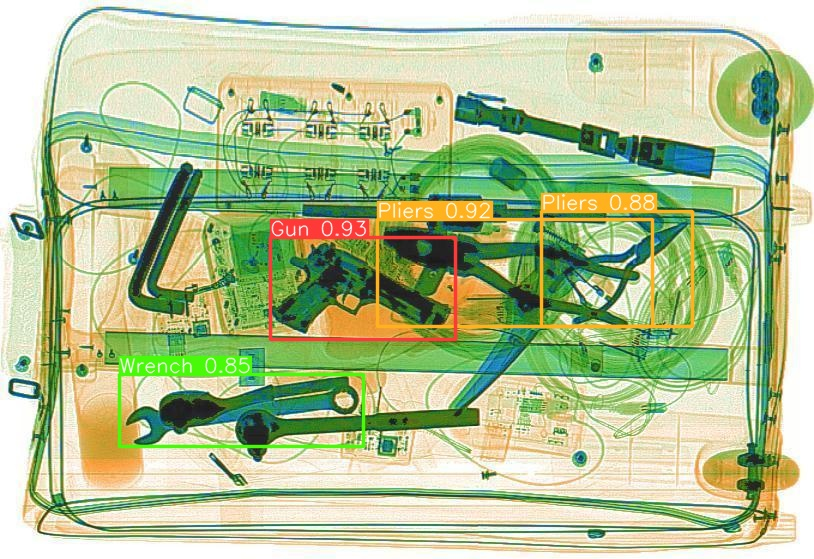

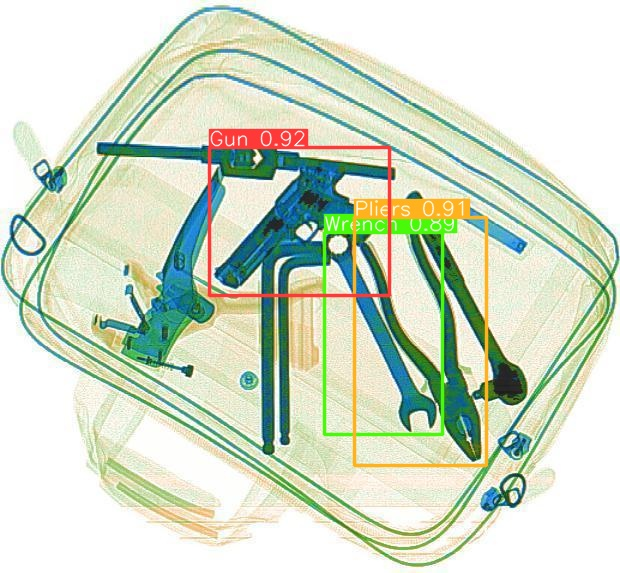

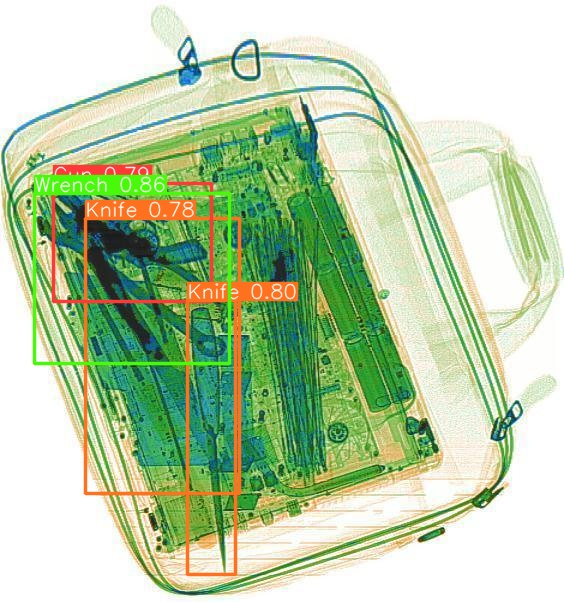

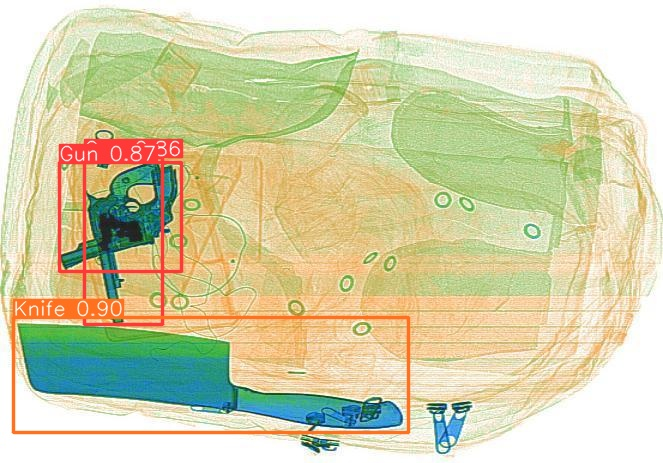

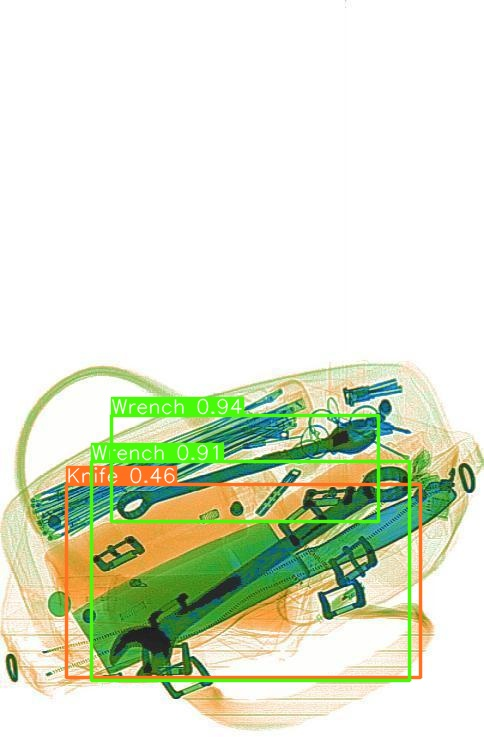

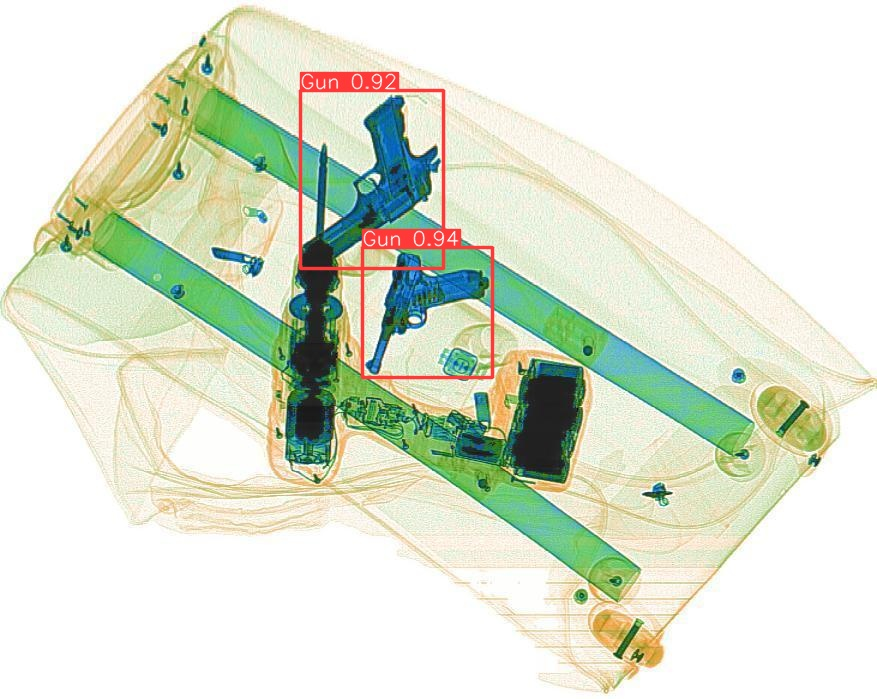

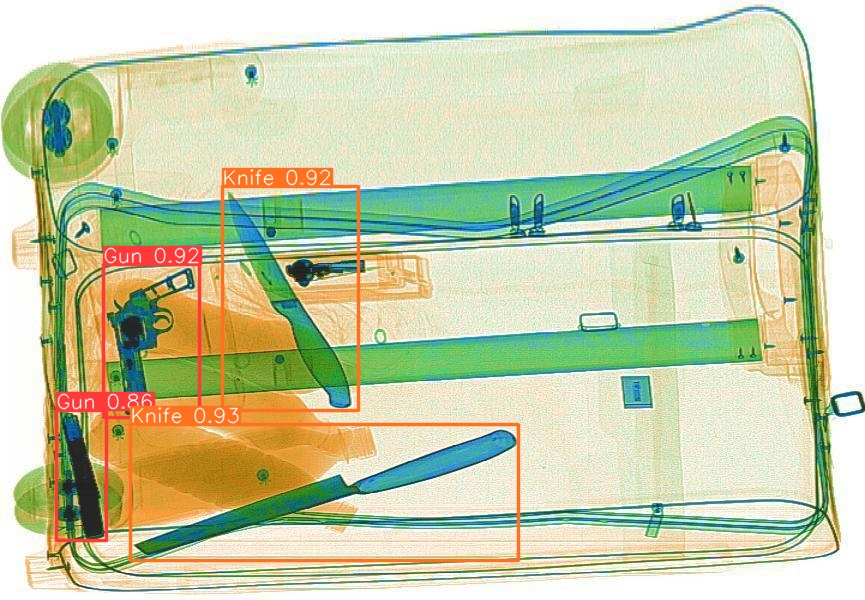

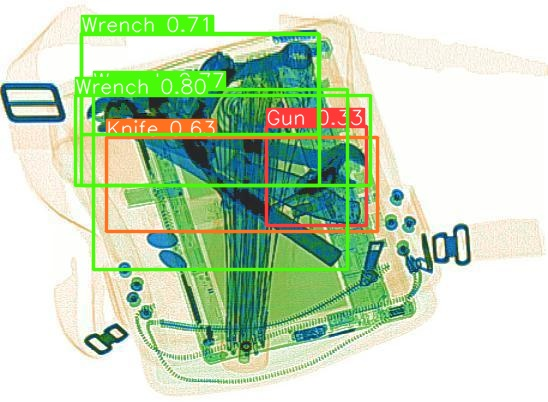

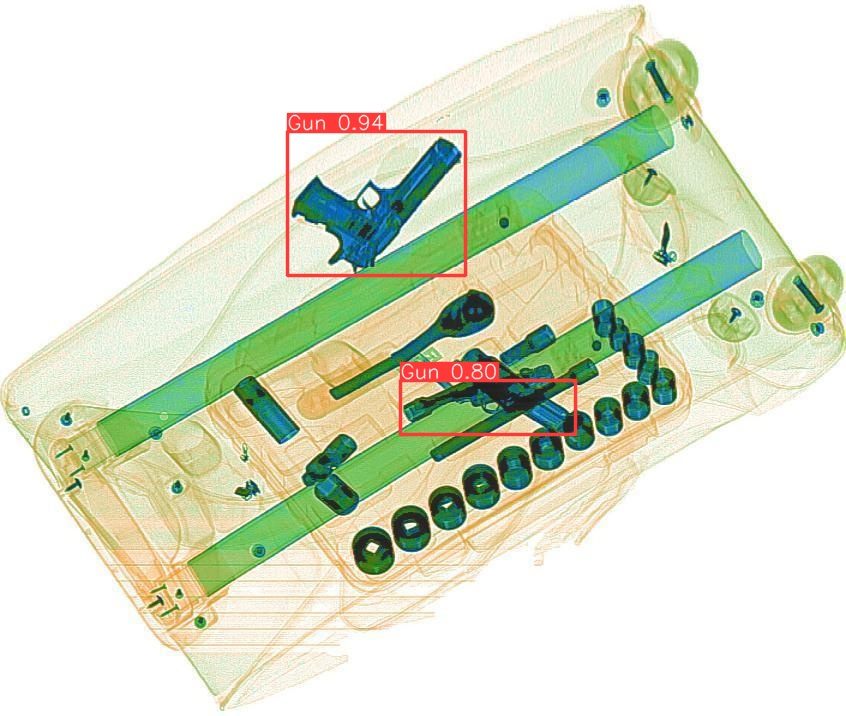

In [9]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-4/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)


image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 7 Guns, 22.9ms
Speed: 2.7ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
ERROR ❌️ Benchmark failure for PyTorch: '/kaggle/working/datasets/sixray100-1/data.yaml' does not exist

PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (83.6 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 2.7s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript' (167.0 MB)

Export complete (2.8s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 data=/kaggl

In [1]:
!zip -r YOLOvl_weights.zip /kaggle/working/runs/detect/

  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/P00429_jpg.rf.f0f46cf685454bccbae1fd5051a78e9c.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P01797_jpg.rf.ccdc7a30b24dfc9df43d66dc9961963b.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P02556_jpg.rf.298ea25e2348f725afe84ed767558bb0.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/P02443_jpg.rf.7651f4ea5952ff148c8fe5aad46e93e0.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P00861_jpg.rf.54a623227938fce30d02b68a817d7943.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/predict/P02429_jpg.rf.d892e6e79df463ad1b114bbfda744a38.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/P02614_jpg.rf.9f27b92c16badf371674bba20c2468f2.jpg (deflated 9%)
  adding:

In [ ]:
#from IPython.display import FileLink
#FileLink(r'/kaggle/working/YOLOvl_weights.zip')